In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/EV_Data  (1).csv')  # Update with your actual file name

# Print column names and first few rows
print("Columns:", dataset.columns.tolist())
print("\nData\n")
print(dataset.head())


Columns: ['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status', 'Education', 'No. of Family members', 'Annual Income', 'Would you prefer replacing all your vehicles to Electronic vehicles?', 'If Yes/Maybe what type of  EV would you prefer?', 'Do you think Electronic Vehicles are economical?', 'Which brand of vehicle do you currently own?', 'How much money could you spend on an Electronic vehicle?', 'Preference for wheels in EV', 'Do you think Electronic vehicles will replace fuel cars in India?']

Data

   Unnamed: 0  Age       City Profession Marital Status Education  \
0           0   30      Nabha        NaN         Single  Graduate   
1           1   27       Pune        NaN         Single  Graduate   
2           2   32  Kashipur         NaN         Single  Graduate   
3           3   55       Pune   Business         Single  Graduate   
4           4   26     Satara        NaN         Single  Graduate   

   No. of Family members  Annual Income  \
0                      5  

In [ ]:
# Extract the first 5 columns for analysis
segmentation_variables = dataset.iloc[:, :5]
print("Segmentation Variables:\n", segmentation_variables.head())

# Check for missing values
missing_values = dataset.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Display dataset info
print("\nDataset Info:")
dataset.info()

Segmentation Variables:
    Unnamed: 0  Age       City Profession Marital Status
0           0   30      Nabha        NaN         Single
1           1   27       Pune        NaN         Single
2           2   32  Kashipur         NaN         Single
3           3   55       Pune   Business         Single
4           4   26     Satara        NaN         Single

Missing Values:
 Unnamed: 0                                                                0
Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you pre

In [ ]:
# Check the unique values in each column to identify any that need conversion
for column in dataset.columns:
    print(f"{column}: {dataset[column].unique()}")

# Convert any categorical data to numeric if needed (update as per your dataset)
# Example: If there are 'Yes'/'No' values, use the following line
# dataset['SomeColumn'] = dataset['SomeColumn'].map({'Yes': 1, 'No': 0})

# Calculate and display means of numeric columns
numeric_means = dataset.mean(numeric_only=True)  # numeric_only=True excludes non-numeric columns
print("\nMeans of Numeric Columns:\n", numeric_means)

Unnamed: 0: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 24

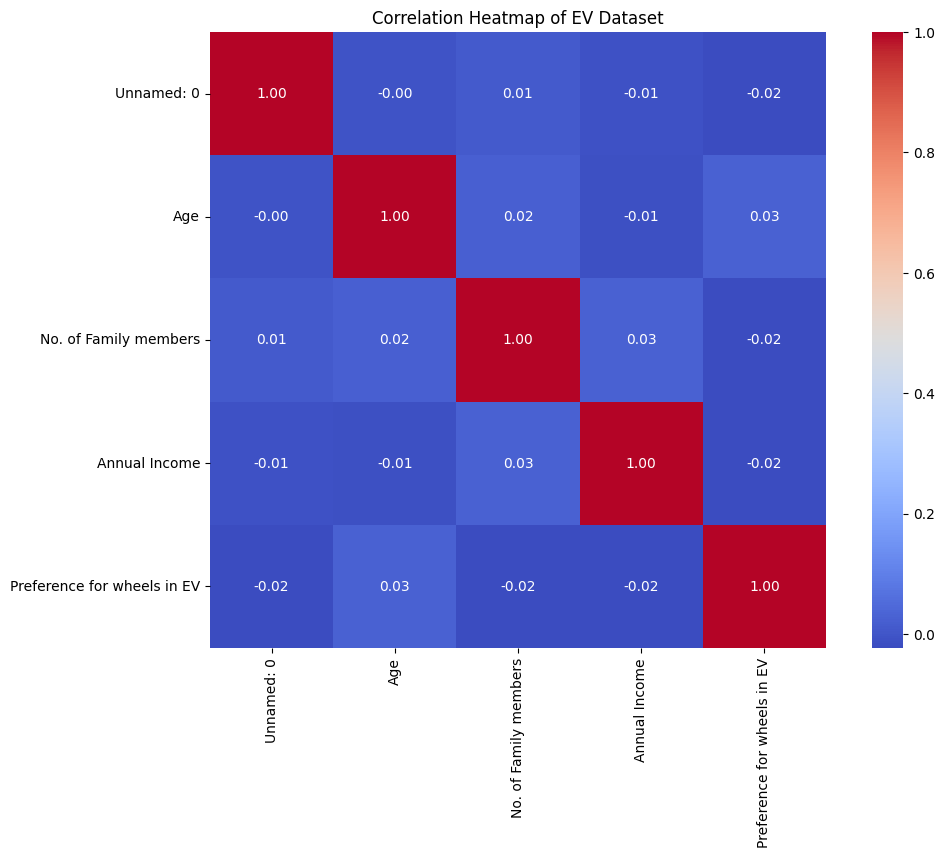

In [ ]:
# Select only numeric columns for correlation
numeric_dataset = dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Title and display
plt.title('Correlation Heatmap of EV Dataset')
plt.show()

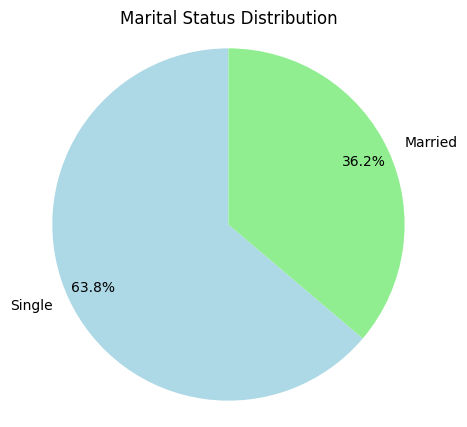

In [ ]:
# Marital Status distribution
marital_counts = dataset['Marital Status'].value_counts()

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(marital_counts, labels=marital_counts.index, colors=['lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

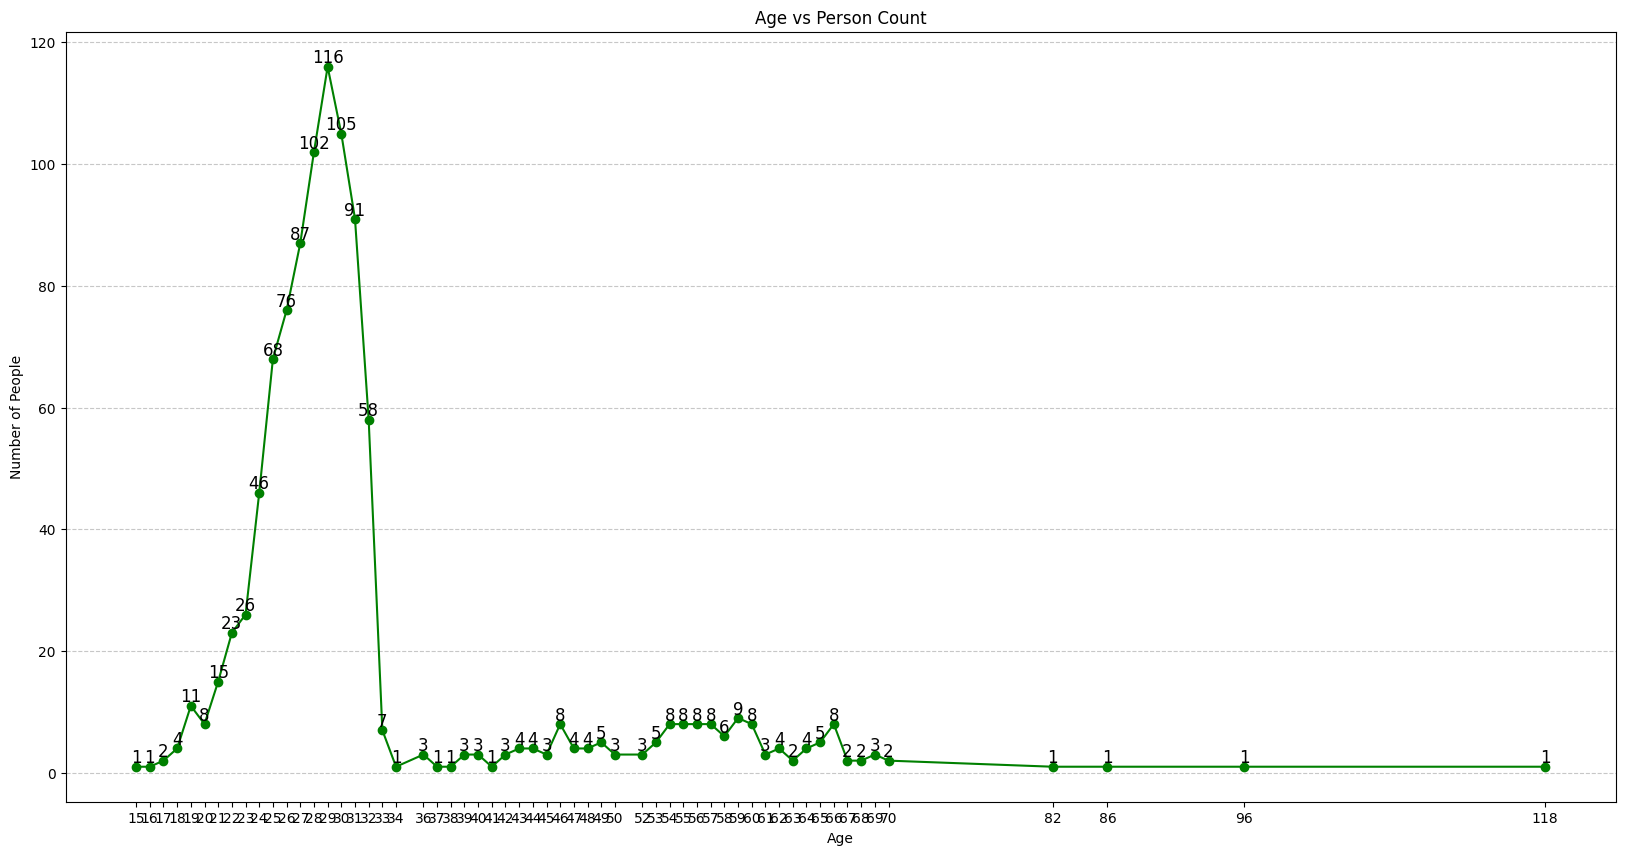

In [ ]:
# Count the occurrences of each age
age_counts = dataset['Age'].value_counts().sort_index()

# Create the line graph
plt.figure(figsize=(20, 10))
plt.plot(age_counts.index, age_counts.values, color='green', marker='o')

# Adding labels (point values) to the markers
for x, y in zip(age_counts.index, age_counts.values):
    plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')  # Annotate each point

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age vs Person Count')
plt.xticks(age_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Explained Variance Ratio: [0.7  0.24 0.02 0.01 0.01 0.01 0.01 0.01 0.   0.  ]


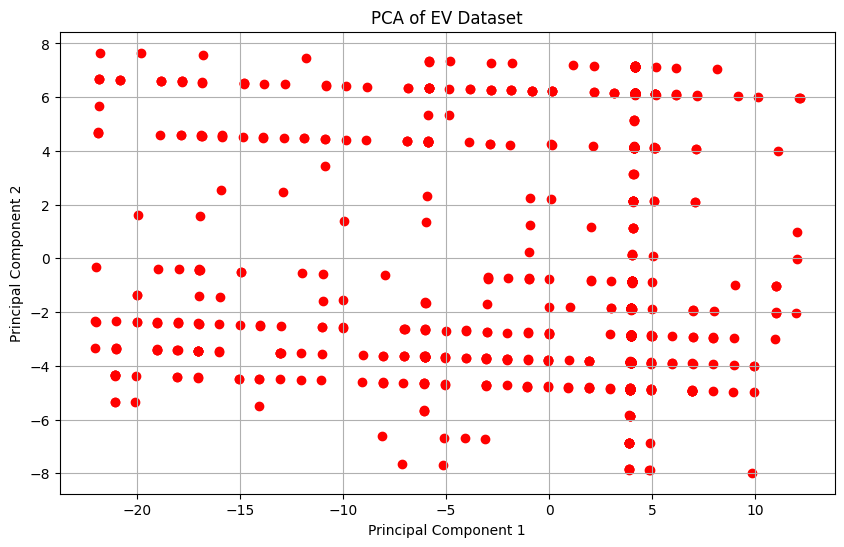

In [ ]:
# Check and update categorical columns based on your dataset
categorical_cols = [
    'City',
    'Profession',
    'Marital Status',
    'Education',
    'Would you prefer replacing all your vehicles to Electronic vehicles?',
    'If Yes/Maybe what type of EV would you prefer?',  # Ensure this is the correct name
    'Do you think Electronic Vehicles are economical?',
    'Which brand of vehicle do you currently own?',
    'How much money could you spend on an Electronic vehicle?',
    'Preference for wheels in EV',
    'Do you think Electronic vehicles will replace fuel cars in India?'
]

# Encode categorical columns
label_encoder = LabelEncoder()

# Check if all categorical columns exist in the dataset
existing_cols = [col for col in categorical_cols if col in dataset.columns]

# Encode only existing columns
encoded_data = dataset[existing_cols].apply(label_encoder.fit_transform)

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(encoded_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_.round(2)
print("Explained Variance Ratio:", explained_variance)

# PCA scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], color='red')
plt.title('PCA of EV Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
print(dataset.columns.tolist())

['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status', 'Education', 'No. of Family members', 'Annual Income', 'Would you prefer replacing all your vehicles to Electronic vehicles?', 'If Yes/Maybe what type of  EV would you prefer?', 'Do you think Electronic Vehicles are economical?', 'Which brand of vehicle do you currently own?', 'How much money could you spend on an Electronic vehicle?', 'Preference for wheels in EV', 'Do you think Electronic vehicles will replace fuel cars in India?']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Load your dataset (ensure the correct path is specified)
# dataset = pd.read_csv('path_to_your_dataset.csv')

# Print column names to check for discrepancies
print("Column names in the dataset:")
print(dataset.columns)

# Clean column names (remove leading/trailing spaces)
dataset.columns = dataset.columns.str.strip()

# Encoding categorical columns
categorical_cols = ['City', 'Profession', 'Marital Status', 'Education',
                    'Would you prefer replacing all your vehicles to Electronic vehicles?',
                    'If Yes/Maybe what type of EV would you prefer?',
                    'Do you think Electronic Vehicles are economical?',
                    'Which brand of vehicle do you currently own?',
                    'Preference for wheels in EV',
                    'Do you think Electronic vehicles will replace fuel cars in India?']

# Check if all categorical columns are present
missing_cols = [col for col in categorical_cols if col not in dataset.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    # Encode categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        dataset[col] = label_encoder.fit_transform(dataset[col])

    # Selecting relevant columns for PCA (for the first 11 relevant columns)
    MD_x = dataset.iloc[:, :11].values  # Update the index if needed based on your dataset structure

    # Perform PCA
    pca = PCA()
    MD_pca = pca.fit_transform(MD_x)

    # Explained variance
    explained_variance = pca.explained_variance_ratio_.round(2)
    print("Explained Variance Ratio:", explained_variance)

    # PCA scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(MD_pca[:, 5], MD_pca[:, 3], color='lightgreen')
    plt.title('PCA of EV Marketing Data')
    plt.xlabel('Principal Component 5')  # Update with appropriate labels
    plt.ylabel('Principal Component 3')  # Update with appropriate labels
    plt.grid()
    plt.show()


Column names in the dataset:
Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')
Missing columns: ['If Yes/Maybe what type of EV would you prefer?']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/EV_Data  (1).csv')  # Replace with your dataset path

# Select relevant numeric features for clustering
features = data[['Age', 'No. of Family members', 'Annual Income']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define the number of clusters
n_clusters = 4  # Adjust based on your requirement

# Create KMeans model and fit it
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the cluster assignments
print(data[['Age', 'No. of Family members', 'Annual Income', 'Cluster']])


     Age  No. of Family members  Annual Income  Cluster
0     30                      5   1.193876e+06        0
1     27                      4   1.844540e+06        0
2     32                      4   2.948150e+06        0
3     55                      3   2.832380e+06        1
4     26                      4   2.638751e+06        0
..   ...                    ...            ...      ...
995   31                      7   2.110722e+06        3
996   29                      4   1.616288e+06        0
997   30                      4   2.202829e+06        0
998   24                      4   1.764744e+06        0
999   30                      4   2.486664e+06        0

[1000 rows x 4 columns]


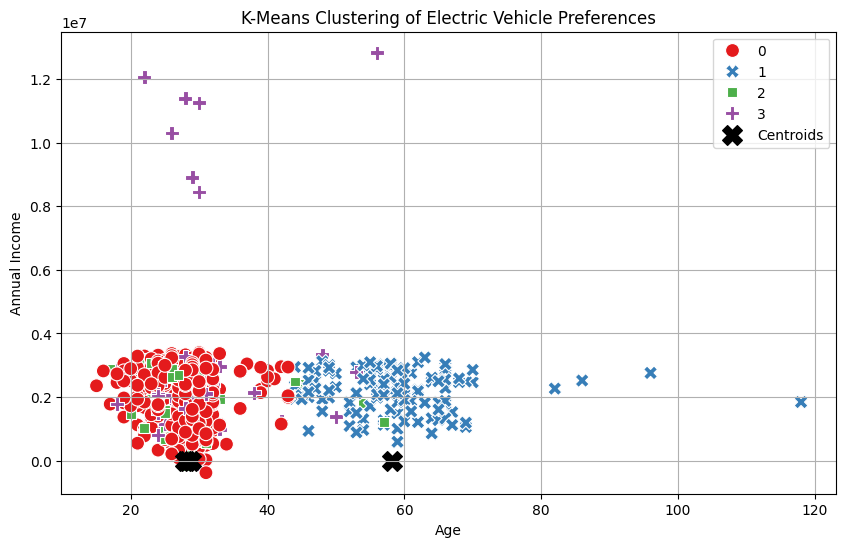

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/EV_Data  (1).csv')  # Replace with your dataset path

# Select relevant numeric features for clustering
features = data[['Age', 'No. of Family members', 'Annual Income']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define the number of clusters
n_clusters = 4  # Adjust based on your requirement

# Create KMeans model and fit it
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Annual Income', hue='Cluster', palette='Set1', style='Cluster', s=100)

# Adding cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=200, label='Centroids')

plt.title('K-Means Clustering of Electric Vehicle Preferences')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.grid()
plt.show()


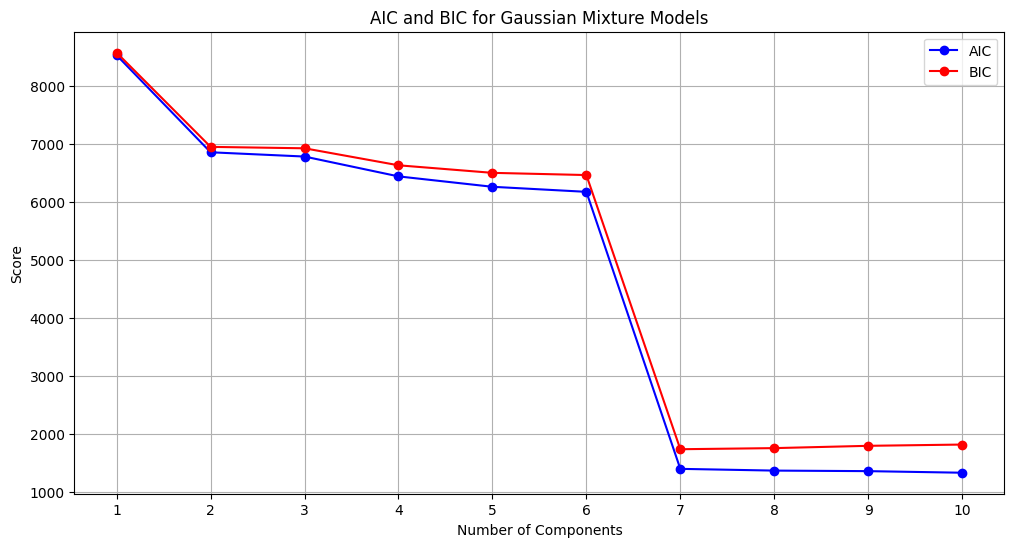

Optimal number of components according to AIC: 10
Optimal number of components according to BIC: 7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/EV_Data  (1).csv')  # Replace with your dataset path

# Select relevant numeric features for GMM
features = data[['Age', 'No. of Family members', 'Annual Income']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Range of components to test
n_components_range = range(1, 11)  # Adjust as needed
aic_values = []
bic_values = []

# Fit GMM for each number of components and calculate AIC and BIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(scaled_features)
    aic_values.append(gmm.aic(scaled_features))
    bic_values.append(gmm.bic(scaled_features))

# Plot AIC and BIC values
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic_values, marker='o', label='AIC', color='blue')
plt.plot(n_components_range, bic_values, marker='o', label='BIC', color='red')
plt.title('AIC and BIC for Gaussian Mixture Models')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.xticks(n_components_range)
plt.show()

# Optimal number of components
optimal_aic = n_components_range[np.argmin(aic_values)]
optimal_bic = n_components_range[np.argmin(bic_values)]
print(f'Optimal number of components according to AIC: {optimal_aic}')
print(f'Optimal number of components according to BIC: {optimal_bic}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/EV_Data  (1).csv')  # Replace with your dataset path

# Select relevant numeric features for clustering
features = data[['Age', 'No. of Family members', 'Annual Income']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit GMM with the chosen number of components (e.g., 4)
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(scaled_features)

# Fit KMeans with the same number of components
kmeans = KMeans(n_clusters=n_components, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Calculate the log-likelihood
log_likelihood = gmm.score(scaled_features) * scaled_features.shape[0]

# Create a confusion matrix
conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)

# Convert confusion matrix to a DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix,
                               index=[f'KMeans_Cluster {i}' for i in range(n_components)],
                               columns=[f'GMM_Cluster {i}' for i in range(n_components)])

# Display the confusion matrix and log-likelihood
print("Confusion Matrix:")
print(conf_matrix_df)
print(f"\nLog-Likelihood for GMM with k={n_components}: {log_likelihood:.5f}")


Confusion Matrix:
                  GMM_Cluster 0  GMM_Cluster 1  GMM_Cluster 2  GMM_Cluster 3
KMeans_Cluster 0            672             16              0              1
KMeans_Cluster 1              0            124              0              0
KMeans_Cluster 2              0              5             77              0
KMeans_Cluster 3             34              6              0             65

Log-Likelihood for GMM with k=4: -3181.45521


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/EV_Data  (1).csv')  # Replace with your dataset path

# Select relevant numeric features for clustering
features = data[['Age', 'No. of Family members', 'Annual Income']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit GMM with the chosen number of components (e.g., 4)
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=0)
data['GMM_Cluster'] = gmm.fit_predict(scaled_features)

# Fit KMeans with the same number of components
kmeans = KMeans(n_clusters=n_components, random_state=0)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Profiling segments
gmm_profile = data.groupby('GMM_Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'No. of Family members': ['mean', 'std', 'min', 'max'],
    'Annual Income': ['mean', 'std', 'min', 'max'],
}).reset_index()

kmeans_profile = data.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'No. of Family members': ['mean', 'std', 'min', 'max'],
    'Annual Income': ['mean', 'std', 'min', 'max'],
}).reset_index()

# Renaming columns for better readability
gmm_profile.columns = ['GMM_Cluster', 'Age_Mean', 'Age_Std', 'Age_Min', 'Age_Max',
                       'Family_Members_Mean', 'Family_Members_Std', 'Family_Members_Min', 'Family_Members_Max',
                       'Annual_Income_Mean', 'Annual_Income_Std', 'Annual_Income_Min', 'Annual_Income_Max']

kmeans_profile.columns = ['KMeans_Cluster', 'Age_Mean', 'Age_Std', 'Age_Min', 'Age_Max',
                          'Family_Members_Mean', 'Family_Members_Std', 'Family_Members_Min', 'Family_Members_Max',
                          'Annual_Income_Mean', 'Annual_Income_Std', 'Annual_Income_Min', 'Annual_Income_Max']

# Displaying the profiles
print("GMM Cluster Profiles:")
print(gmm_profile)
print("\nKMeans Cluster Profiles:")
print(kmeans_profile)


GMM Cluster Profiles:
   GMM_Cluster   Age_Mean    Age_Std  Age_Min  Age_Max  Family_Members_Mean  \
0            0  27.705382   3.135412       16       36             4.147309   
1            1  55.344371  11.401197       15      118             4.145695   
2            2  26.974026   3.383295       17       33             1.051948   
3            3  27.363636   4.825051       18       56             7.318182   

   Family_Members_Std  Family_Members_Min  Family_Members_Max  \
0            0.719219                   3                   6   
1            1.338643                   0                   8   
2            0.856801                   0                   2   
3            1.025207                   4                   8   

   Annual_Income_Mean  Annual_Income_Std  Annual_Income_Min  Annual_Income_Max  
0        2.212523e+06       6.951399e+05     -376150.862928       3.399310e+06  
1        2.246245e+06       6.274146e+05      597599.598556       3.331330e+06  
2        2.10

<Figure size 1200x600 with 0 Axes>

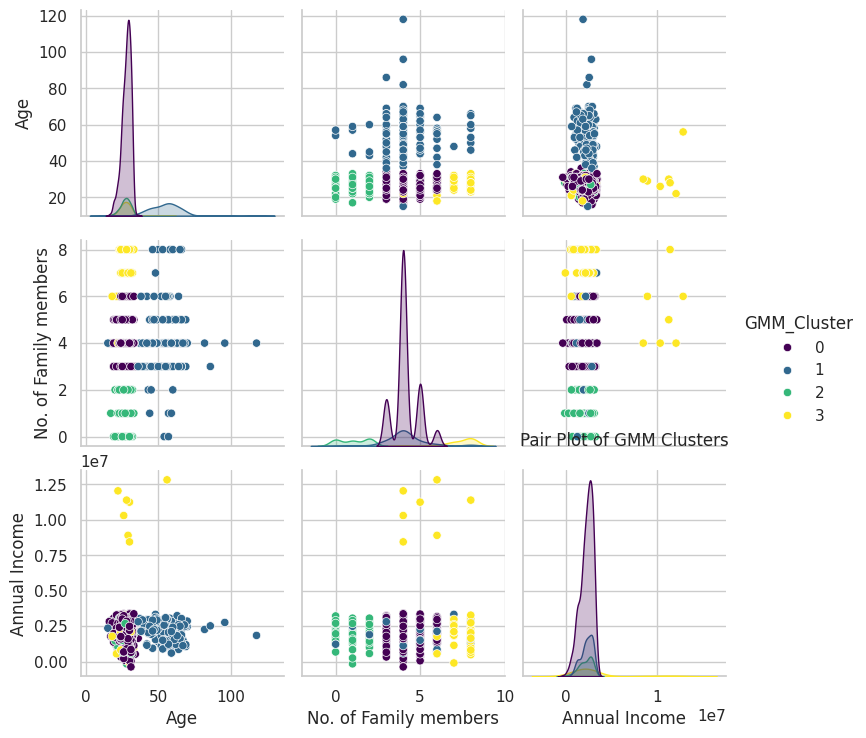

<Figure size 1200x600 with 0 Axes>

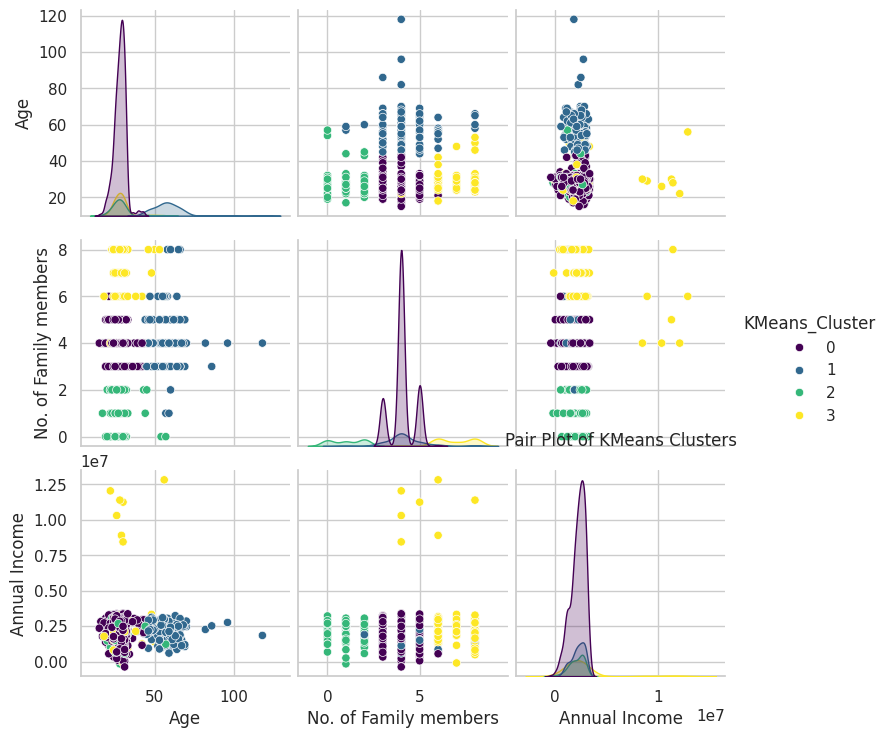

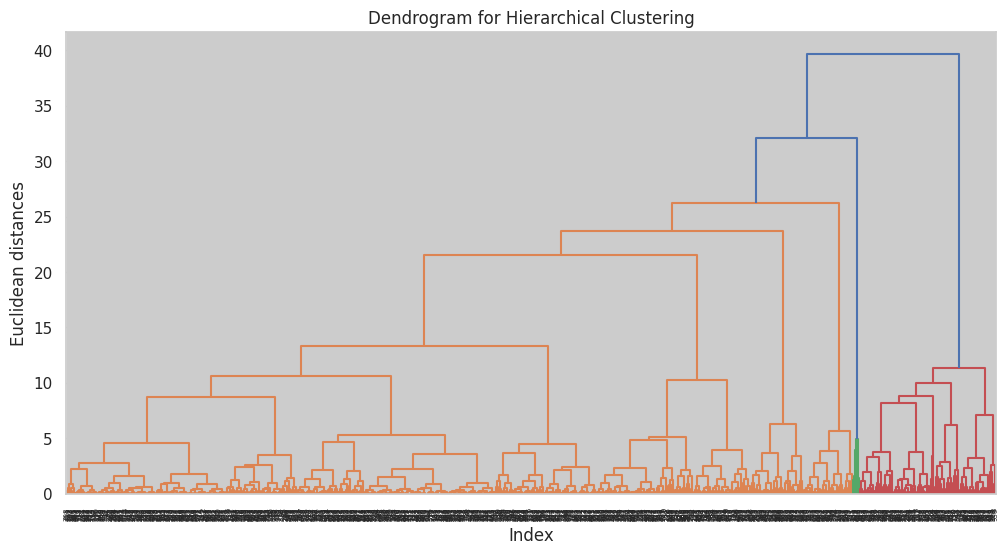

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Set the style for the plots
sns.set(style='whitegrid')

# Pair plot for GMM clusters
plt.figure(figsize=(12, 6))
sns.pairplot(data, hue='GMM_Cluster', vars=['Age', 'No. of Family members', 'Annual Income'], palette='viridis')
plt.title('Pair Plot of GMM Clusters')
plt.show()

# Pair plot for KMeans clusters
plt.figure(figsize=(12, 6))
sns.pairplot(data, hue='KMeans_Cluster', vars=['Age', 'No. of Family members', 'Annual Income'], palette='viridis')
plt.title('Pair Plot of KMeans Clusters')
plt.show()

# Create a dendrogram for hierarchical clustering
linked = linkage(scaled_features, 'ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()


<ipython-input-36-ae9d35fd34b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gmm_cluster_counts.index, y=gmm_cluster_counts.values, palette='viridis')


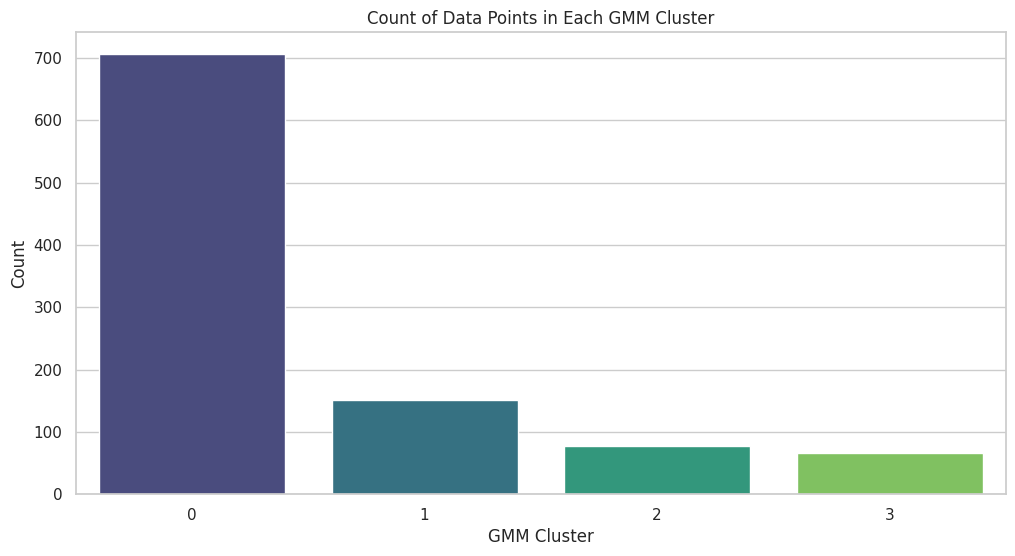

<ipython-input-36-ae9d35fd34b0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kmeans_cluster_counts.index, y=kmeans_cluster_counts.values, palette='viridis')


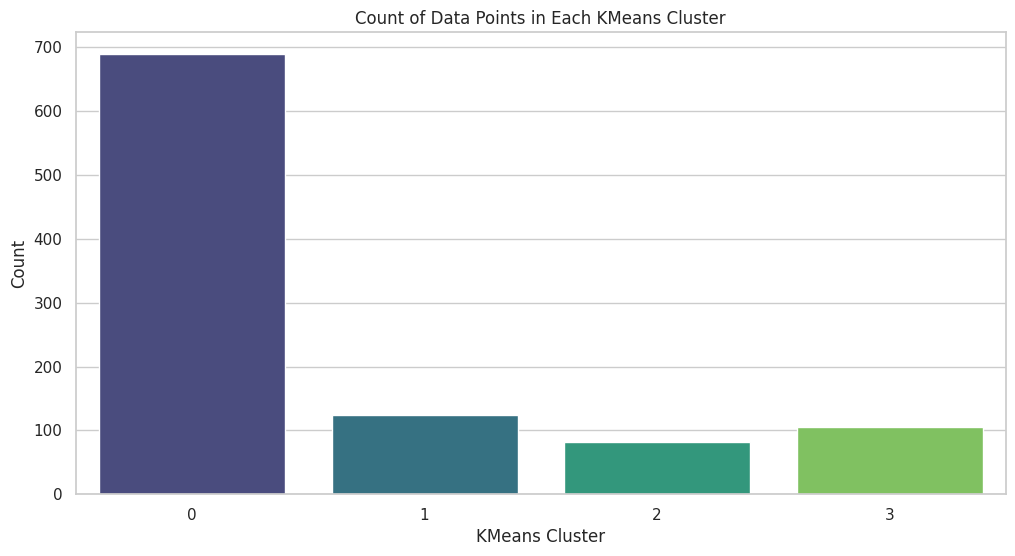

In [ ]:
# Count the number of data points in each GMM cluster
gmm_cluster_counts = data['GMM_Cluster'].value_counts().sort_index()
kmeans_cluster_counts = data['KMeans_Cluster'].value_counts().sort_index()

# Plotting cluster counts for GMM
plt.figure(figsize=(12, 6))
sns.barplot(x=gmm_cluster_counts.index, y=gmm_cluster_counts.values, palette='viridis')
plt.title('Count of Data Points in Each GMM Cluster')
plt.xlabel('GMM Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plotting cluster counts for KMeans
plt.figure(figsize=(12, 6))
sns.barplot(x=kmeans_cluster_counts.index, y=kmeans_cluster_counts.values, palette='viridis')
plt.title('Count of Data Points in Each KMeans Cluster')
plt.xlabel('KMeans Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


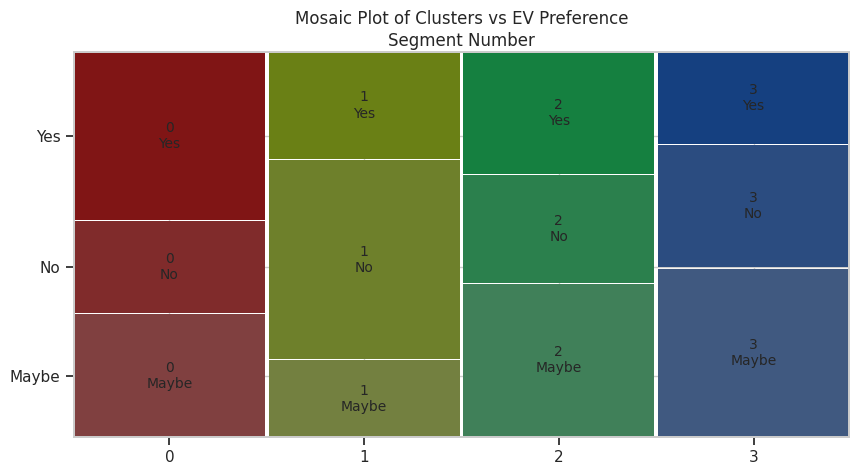

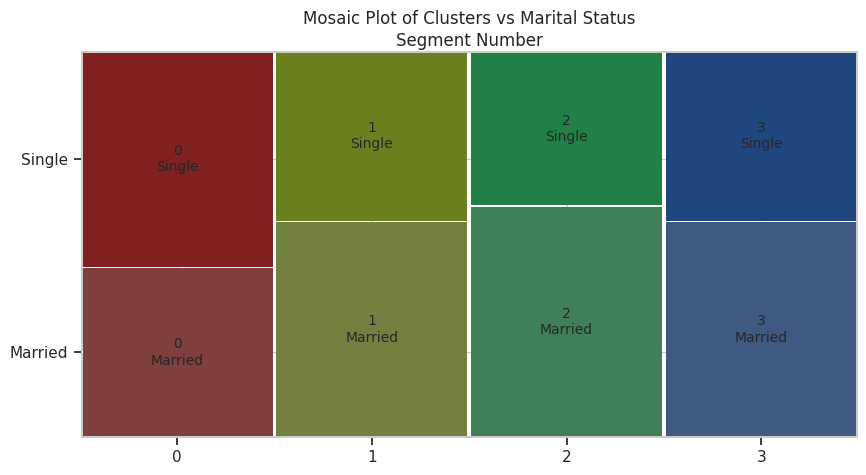

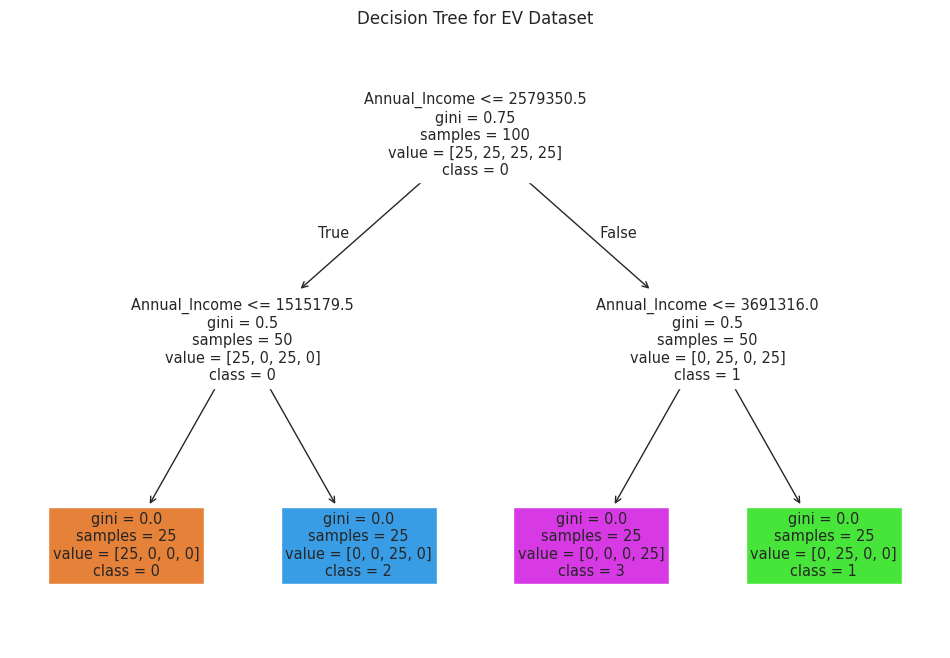

Mean Age by Cluster:
k4
0    41.16
1    35.84
2    34.20
3    44.00
Name: Age, dtype: float64

Mean Annual Income by Cluster:
k4
0    1039249.56
1    4327025.48
2    2020707.48
3    3087539.08
Name: Annual_Income, dtype: float64

Proportion of Married by Cluster:
k4
0    0.44
1    0.56
2    0.60
3    0.56
Name: Marital_Status, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Simulate example data for EV dataset
np.random.seed(0)
num_samples = 100

# Simulate a dataset similar to the EV dataset
ev_data = pd.DataFrame({
    'Age': np.random.randint(18, 65, size=num_samples),
    'City': np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=num_samples),
    'Profession': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist'], size=num_samples),
    'Marital_Status': np.random.choice(['Single', 'Married'], size=num_samples),
    'Education': np.random.choice(['Graduate', 'Post Graduate'], size=num_samples),
    'No_of_Family_Members': np.random.randint(1, 6, size=num_samples),
    'Annual_Income': np.random.randint(500000, 5000000, size=num_samples),
    'Preference_for_EV': np.random.choice(['Yes', 'No', 'Maybe'], size=num_samples),
})

# Step 2: Create clusters
kmeans = KMeans(n_clusters=4, random_state=0)
ev_data['k4'] = kmeans.fit_predict(ev_data[['Age', 'No_of_Family_Members', 'Annual_Income']])

# Step 3: Create contingency tables for mosaic plots
k4_crosstab_ev_pref = pd.crosstab(ev_data['k4'], ev_data['Preference_for_EV'])
k4_crosstab_gender = pd.crosstab(ev_data['k4'], ev_data['Marital_Status'])

# Step 4: Mosaic plots
plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_ev_pref.stack(), title='Mosaic Plot of Clusters vs EV Preference', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('EV Preference Count')
plt.show()

plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_gender.stack(), title='Mosaic Plot of Clusters vs Marital Status', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Marital Status Count')
plt.show()

# Step 5: Prepare data for the decision tree
# Encode the categorical variables
label_encoder = LabelEncoder()
ev_data['Marital_Status_encoded'] = label_encoder.fit_transform(ev_data['Marital_Status'])
ev_data['Preference_for_EV_encoded'] = label_encoder.fit_transform(ev_data['Preference_for_EV'])

# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(ev_data[['Age', 'No_of_Family_Members', 'Annual_Income', 'Marital_Status_encoded']], ev_data['k4'])

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Age', 'No_of_Family_Members', 'Annual_Income', 'Marital_Status_encoded'],
          class_names=['0', '1', '2', '3'], filled=True)
plt.title('Decision Tree for EV Dataset')
plt.show()

# Step 6: Calculate visitation and likes means (now means of numerical features)
mean_age = ev_data.groupby('k4')['Age'].mean()
mean_income = ev_data.groupby('k4')['Annual_Income'].mean()
female_ratio = ev_data.groupby('k4')['Marital_Status'].apply(lambda x: (x == 'Married').mean())

# Displaying the means
print("Mean Age by Cluster:")
print(mean_age)
print("\nMean Annual Income by Cluster:")
print(mean_income)
print("\nProportion of Married by Cluster:")
print(female_ratio)
